## NANDIKI NEHA
## 21BCE8239
## VIT - AP

## IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## IMPORT DATASET

In [6]:
df=pd.read_csv("titanic-dataset.csv")

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
corr=df.corr()
corr

C:\Users\Neha Nandiki\AppData\Local\Temp\ipykernel_12352\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

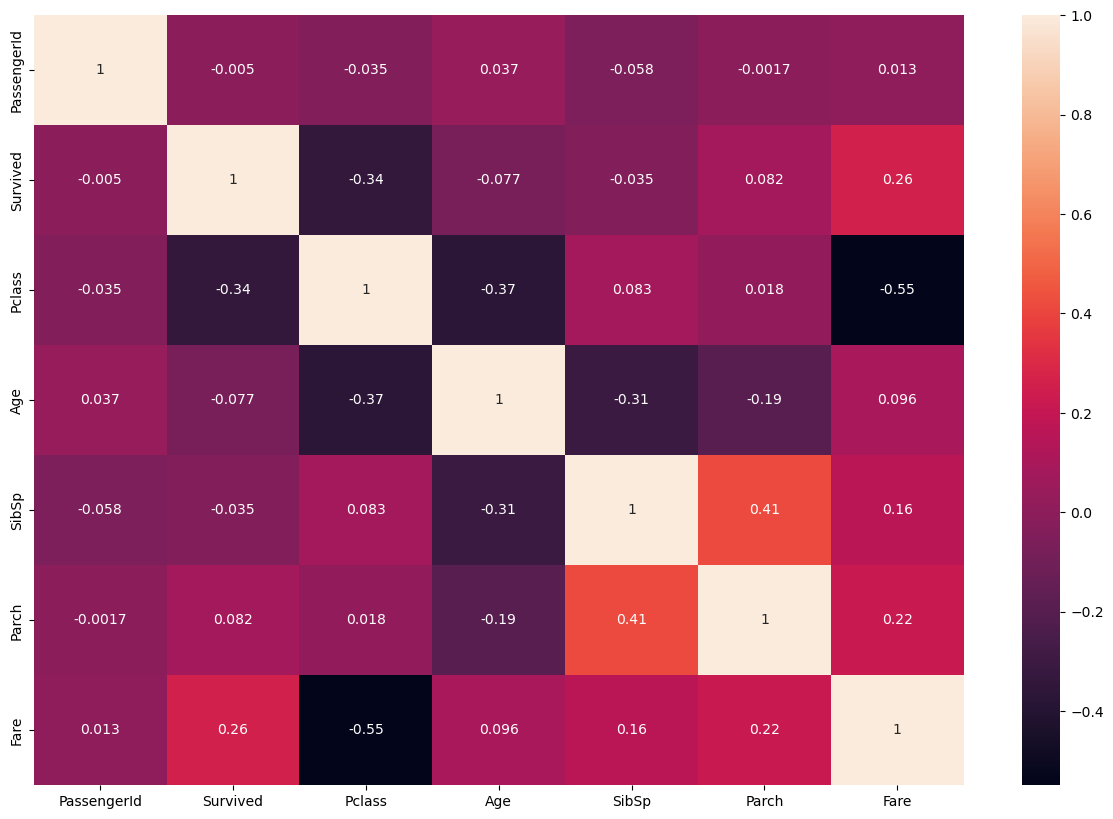

In [14]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [15]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## CHECK FOR NULL VALUES

In [19]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### FILL NULL VALUES IN THE 'AGE' COLUMN WITH THE MEAN AGE

In [23]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

### FILL NULL VALUES IN THE 'EMBARKED' COLUMN WITH THE MOST COMMON VALUE

In [24]:
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

In [25]:
df.drop(['Cabin'],axis=1, inplace=True)

In [26]:
df.drop(['Ticket'],axis=1, inplace=True)

In [27]:
df.drop(['Name'],axis=1,inplace=True)

In [29]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## DATA VISUALIZATION

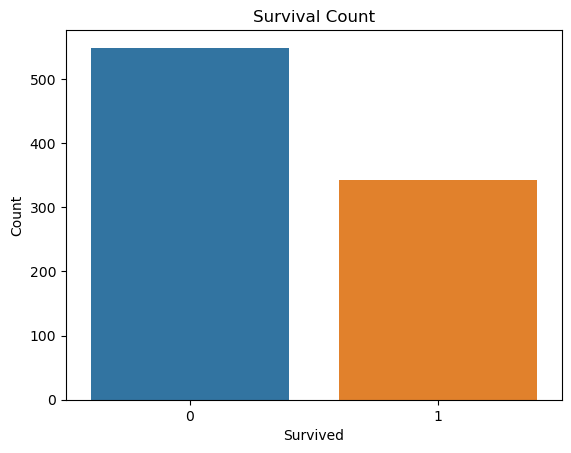

In [30]:
# Visualize the distribution of the 'Survived' column (0 = Not Survived, 1 = Survived)
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

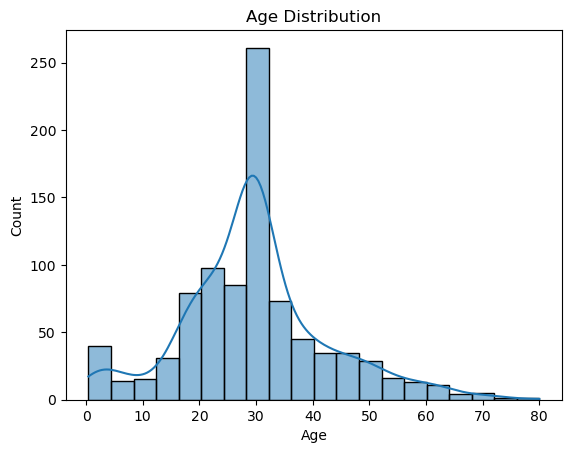

In [31]:
#Visualize the distribution of the 'Age' column
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

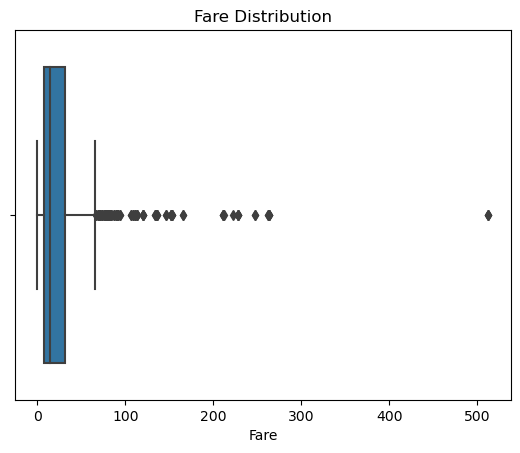

In [32]:
#Visualize the distribution of the 'Fare' column and detect outliers we will handle outliers in the next step
sns.boxplot(data=df, x='Fare')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

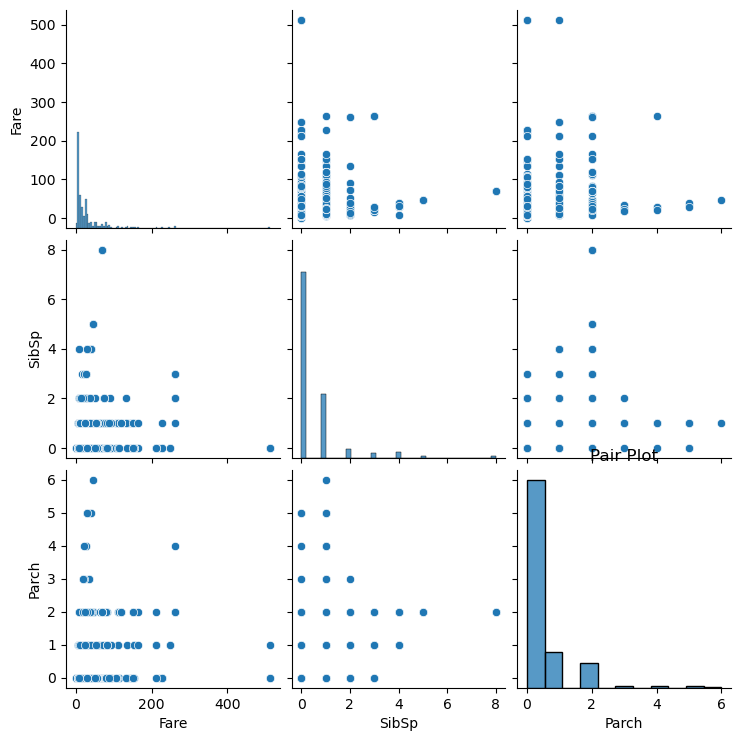

In [33]:
#Pair plot for selected numerical columns
sns.pairplot(data=df[['Fare', 'SibSp', 'Parch']])
plt.title('Pair Plot')
plt.show()

C:\Users\Neha Nandiki\AppData\Local\Temp\ipykernel_12352\554220597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


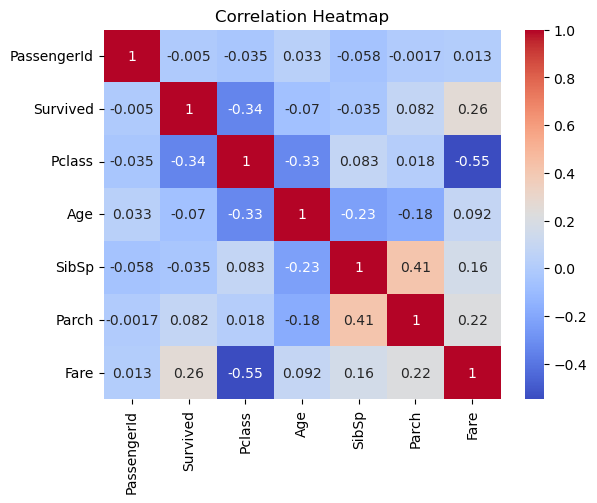

In [35]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## DETECT AND HANDLE OUTLIERS

In [36]:
z_scores = np.abs(stats.zscore(df['Age']))
max_threshold=3
outliers = df['Age'][z_scores > max_threshold]

# Print and visualize the outliers
print("Outliers detected using Z-Score:")
print(outliers)

Outliers detected using Z-Score:
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


In [37]:
z_scores = np.abs(stats.zscore(df['Fare']))
max_threshold=3
outliers = df['Fare'][z_scores > max_threshold]

# Print and visualize the outliers
print("Outliers detected using Z-Score:")
print(outliers)

Outliers detected using Z-Score:
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


In [38]:
column_name = 'Fare'

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows with values outside the IQR bounds
df_cleaned = df[(df[column_name] > lower_bound) & (df[column_name] <upper_bound)]

# Display the original and cleaned DataFrame sizes
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")
df_cleaned

Original DataFrame size: (891, 9)
Cleaned DataFrame size: (775, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


<Axes: >

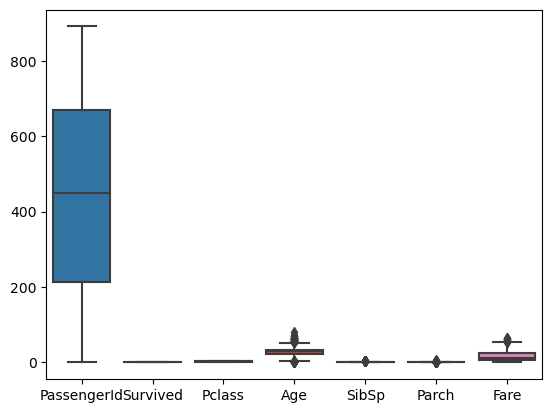

In [39]:
sns.boxplot(df_cleaned)

In [40]:
df=df_cleaned

In [41]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [42]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.000000,1,0,7.2500,S
2,3,3,female,26.000000,0,0,7.9250,S
3,4,1,female,35.000000,1,0,53.1000,S
4,5,3,male,35.000000,0,0,8.0500,S
5,6,3,male,29.699118,0,0,8.4583,Q


In [43]:
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

## PERFORM ENCODING

In [44]:
en = LabelEncoder()
x['Sex'] = en.fit_transform(x['Sex'])

In [45]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,S
2,3,3,0,26.000000,0,0,7.9250,S
3,4,1,0,35.000000,1,0,53.1000,S
4,5,3,1,35.000000,0,0,8.0500,S
5,6,3,1,29.699118,0,0,8.4583,Q


In [46]:
x = pd.get_dummies(x,columns=['Embarked'])

In [48]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.000000,1,0,7.2500,0,0,1
2,3,3,0,26.000000,0,0,7.9250,0,0,1
3,4,1,0,35.000000,1,0,53.1000,0,0,1
4,5,3,1,35.000000,0,0,8.0500,0,0,1
5,6,3,1,29.699118,0,0,8.4583,0,1,0


## FEATURE SCALING

In [50]:
scale = StandardScaler()
x[['Age', 'Fare']] = scale.fit_transform(x[['Age', 'Fare']])

In [52]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,-0.556219,1,0,-0.779117,0,0,1
2,3,3,0,-0.243027,0,0,-0.729373,0,0,1
3,4,1,0,0.461654,1,0,2.599828,0,0,1
4,5,3,1,0.461654,0,0,-0.720161,0,0,1
5,6,3,1,0.046606,0,0,-0.690071,0,1,0


## SPLITTING THE DATA INTO TRAIN AND TEST

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(620, 10)
(155, 10)
(620,)
(155,)
